# Lab 6_3 GAN MNIST

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [10]:
# Hyperparameters
batch_size = 128
epochs = 50
learning_rate = 0.0002
latent_dim = 100
image_size = 28 * 28

# Transformations for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] for better GAN training
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [11]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()  # Outputs values in the range [-1, 1]
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)  # Reshape to image format

In [12]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Outputs probability (0 to 1)
        )

    def forward(self, img):
        return self.model(img.view(-1, image_size))

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [14]:
# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

In [15]:

# Function to generate and plot images
def generate_and_save_images(epoch):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(16, latent_dim).to(device)
        fake_images = generator(z).cpu()

    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i in range(4):
        for j in range(4):
            axes[i, j].imshow(fake_images[i*4 + j].squeeze(), cmap='gray')
            axes[i, j].axis('off')

    plt.show()


Epoch [1/50] Batch 0/469 D Loss: 1.3985, G Loss: 0.7095
Epoch [1/50] Batch 100/469 D Loss: 1.1864, G Loss: 0.9281
Epoch [1/50] Batch 200/469 D Loss: 0.2718, G Loss: 2.3868
Epoch [1/50] Batch 300/469 D Loss: 0.3376, G Loss: 3.7809
Epoch [1/50] Batch 400/469 D Loss: 0.8306, G Loss: 2.4587


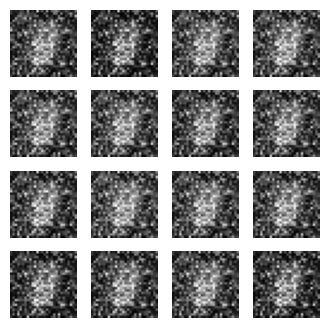

Epoch [2/50] Batch 0/469 D Loss: 0.2825, G Loss: 4.3332
Epoch [2/50] Batch 100/469 D Loss: 0.1337, G Loss: 5.0351
Epoch [2/50] Batch 200/469 D Loss: 0.1009, G Loss: 2.3813
Epoch [2/50] Batch 300/469 D Loss: 0.1696, G Loss: 5.0522
Epoch [2/50] Batch 400/469 D Loss: 0.3236, G Loss: 3.4960
Epoch [3/50] Batch 0/469 D Loss: 0.2601, G Loss: 3.2284
Epoch [3/50] Batch 100/469 D Loss: 1.0732, G Loss: 4.7901
Epoch [3/50] Batch 200/469 D Loss: 0.3217, G Loss: 4.1302
Epoch [3/50] Batch 300/469 D Loss: 0.2531, G Loss: 4.6014
Epoch [3/50] Batch 400/469 D Loss: 0.1175, G Loss: 2.9634
Epoch [4/50] Batch 0/469 D Loss: 0.2135, G Loss: 3.4840
Epoch [4/50] Batch 100/469 D Loss: 0.3939, G Loss: 2.4287
Epoch [4/50] Batch 200/469 D Loss: 0.1271, G Loss: 3.4748
Epoch [4/50] Batch 300/469 D Loss: 0.1800, G Loss: 3.3940
Epoch [4/50] Batch 400/469 D Loss: 0.1251, G Loss: 4.3530
Epoch [5/50] Batch 0/469 D Loss: 0.2567, G Loss: 2.7399
Epoch [5/50] Batch 100/469 D Loss: 0.1628, G Loss: 3.3434
Epoch [5/50] Batch 200

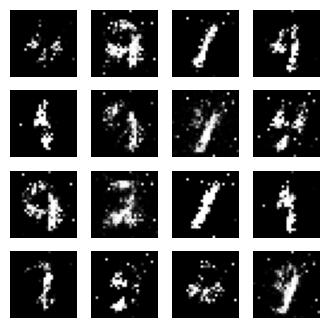

Epoch [12/50] Batch 0/469 D Loss: 0.7775, G Loss: 4.6052
Epoch [12/50] Batch 100/469 D Loss: 0.4819, G Loss: 2.4952
Epoch [12/50] Batch 200/469 D Loss: 0.5570, G Loss: 1.7050
Epoch [12/50] Batch 300/469 D Loss: 0.5783, G Loss: 2.3302
Epoch [12/50] Batch 400/469 D Loss: 0.6730, G Loss: 0.7431
Epoch [13/50] Batch 0/469 D Loss: 0.7401, G Loss: 1.4426
Epoch [13/50] Batch 100/469 D Loss: 0.6778, G Loss: 1.9500
Epoch [13/50] Batch 200/469 D Loss: 0.6710, G Loss: 2.0487
Epoch [13/50] Batch 300/469 D Loss: 0.7267, G Loss: 1.8509
Epoch [13/50] Batch 400/469 D Loss: 0.6924, G Loss: 1.9717
Epoch [14/50] Batch 0/469 D Loss: 0.8383, G Loss: 2.5148
Epoch [14/50] Batch 100/469 D Loss: 0.7478, G Loss: 1.1459
Epoch [14/50] Batch 200/469 D Loss: 0.6869, G Loss: 1.5060
Epoch [14/50] Batch 300/469 D Loss: 0.8357, G Loss: 1.0337
Epoch [14/50] Batch 400/469 D Loss: 0.7355, G Loss: 1.9430
Epoch [15/50] Batch 0/469 D Loss: 0.7581, G Loss: 1.6320
Epoch [15/50] Batch 100/469 D Loss: 0.7520, G Loss: 1.5611
Epoch

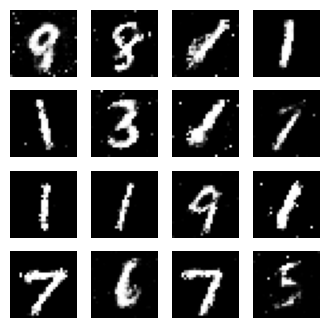

Epoch [22/50] Batch 0/469 D Loss: 0.8689, G Loss: 2.0018
Epoch [22/50] Batch 100/469 D Loss: 0.9329, G Loss: 1.5152
Epoch [22/50] Batch 200/469 D Loss: 0.9020, G Loss: 1.7151
Epoch [22/50] Batch 300/469 D Loss: 0.8705, G Loss: 1.6061
Epoch [22/50] Batch 400/469 D Loss: 0.8648, G Loss: 1.8161
Epoch [23/50] Batch 0/469 D Loss: 1.1257, G Loss: 2.4269
Epoch [23/50] Batch 100/469 D Loss: 1.0114, G Loss: 1.2929
Epoch [23/50] Batch 200/469 D Loss: 0.9408, G Loss: 1.3463
Epoch [23/50] Batch 300/469 D Loss: 0.8830, G Loss: 1.2654
Epoch [23/50] Batch 400/469 D Loss: 1.0102, G Loss: 1.5192
Epoch [24/50] Batch 0/469 D Loss: 0.9161, G Loss: 1.4992
Epoch [24/50] Batch 100/469 D Loss: 0.8821, G Loss: 1.7999
Epoch [24/50] Batch 200/469 D Loss: 0.8355, G Loss: 1.5291
Epoch [24/50] Batch 300/469 D Loss: 0.9890, G Loss: 1.3692
Epoch [24/50] Batch 400/469 D Loss: 1.0087, G Loss: 1.8314
Epoch [25/50] Batch 0/469 D Loss: 1.2761, G Loss: 2.8902
Epoch [25/50] Batch 100/469 D Loss: 0.8630, G Loss: 2.0519
Epoch

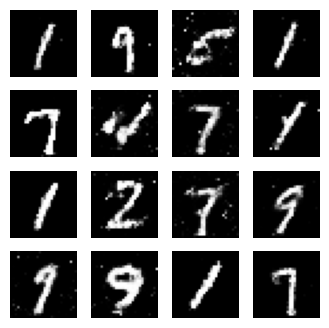

Epoch [32/50] Batch 0/469 D Loss: 1.0194, G Loss: 1.9685
Epoch [32/50] Batch 100/469 D Loss: 1.1475, G Loss: 0.9108
Epoch [32/50] Batch 200/469 D Loss: 1.1073, G Loss: 0.9631
Epoch [32/50] Batch 300/469 D Loss: 0.9164, G Loss: 1.4941
Epoch [32/50] Batch 400/469 D Loss: 0.9741, G Loss: 1.8458
Epoch [33/50] Batch 0/469 D Loss: 1.0973, G Loss: 1.8300
Epoch [33/50] Batch 100/469 D Loss: 0.9161, G Loss: 1.4311
Epoch [33/50] Batch 200/469 D Loss: 1.0146, G Loss: 1.1832
Epoch [33/50] Batch 300/469 D Loss: 1.0343, G Loss: 2.4768
Epoch [33/50] Batch 400/469 D Loss: 0.9545, G Loss: 1.4223
Epoch [34/50] Batch 0/469 D Loss: 0.8511, G Loss: 1.4307
Epoch [34/50] Batch 100/469 D Loss: 0.9574, G Loss: 1.7772
Epoch [34/50] Batch 200/469 D Loss: 1.0680, G Loss: 1.9022
Epoch [34/50] Batch 300/469 D Loss: 0.9700, G Loss: 1.4291
Epoch [34/50] Batch 400/469 D Loss: 1.0348, G Loss: 1.4445
Epoch [35/50] Batch 0/469 D Loss: 1.0356, G Loss: 1.4008
Epoch [35/50] Batch 100/469 D Loss: 0.9032, G Loss: 1.6875
Epoch

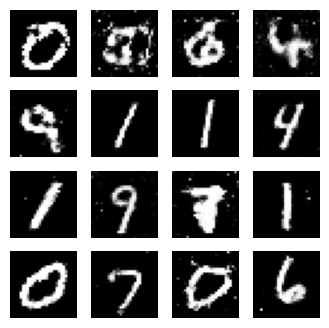

Epoch [42/50] Batch 0/469 D Loss: 0.9360, G Loss: 1.8726
Epoch [42/50] Batch 100/469 D Loss: 0.9089, G Loss: 1.5665
Epoch [42/50] Batch 200/469 D Loss: 0.9155, G Loss: 1.3429
Epoch [42/50] Batch 300/469 D Loss: 0.9102, G Loss: 1.4854
Epoch [42/50] Batch 400/469 D Loss: 0.9086, G Loss: 1.4443
Epoch [43/50] Batch 0/469 D Loss: 1.0974, G Loss: 1.1889
Epoch [43/50] Batch 100/469 D Loss: 0.8405, G Loss: 1.9765
Epoch [43/50] Batch 200/469 D Loss: 0.8961, G Loss: 1.7197
Epoch [43/50] Batch 300/469 D Loss: 0.8055, G Loss: 1.4465
Epoch [43/50] Batch 400/469 D Loss: 0.8421, G Loss: 1.7812
Epoch [44/50] Batch 0/469 D Loss: 0.8204, G Loss: 1.4307
Epoch [44/50] Batch 100/469 D Loss: 0.9783, G Loss: 1.6213
Epoch [44/50] Batch 200/469 D Loss: 0.9994, G Loss: 1.3212
Epoch [44/50] Batch 300/469 D Loss: 0.9170, G Loss: 1.7128
Epoch [44/50] Batch 400/469 D Loss: 0.9323, G Loss: 1.5711
Epoch [45/50] Batch 0/469 D Loss: 0.9860, G Loss: 1.5313
Epoch [45/50] Batch 100/469 D Loss: 0.9256, G Loss: 1.7568
Epoch

In [16]:

# Training the GAN
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_output = discriminator(real_images)
        real_loss = criterion(real_output, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(z)
        fake_output = discriminator(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)  # Try to fool the discriminator

        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {i}/{len(train_loader)} "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Generate and save images every 10 epochs
    if epoch % 10 == 0:
        generate_and_save_images(epoch)
